In [1]:
import os
import sys
import numpy as np
from matplotlib import pyplot as plt
import librosa
from scipy import signal

import libfmp.b
import libfmp.c3

%matplotlib inline

In [4]:
x_example, Fs_example = librosa.load('../../big_corpus/wav_music21/Chill.wav')
name = 'Chill'

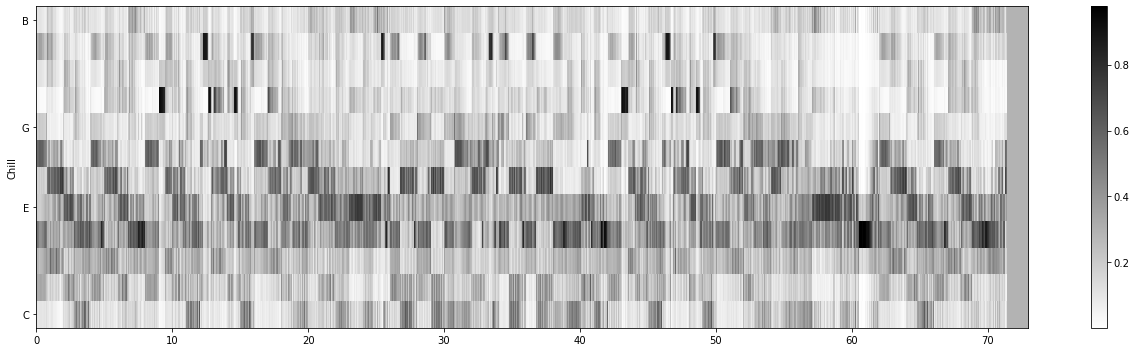

In [18]:
N, H = 2048, 1024
figsize = (18, 5)
yticks = [0, 4, 7, 11]

C_dict = {}
C = librosa.feature.chroma_stft(y=x_example, sr=Fs_example, tuning=0, norm=None, hop_length=H, n_fft=N)
Fs_C = Fs_example / H
C = C / C.max()
threshold = 0.0001
C_dict[name] = libfmp.c3.normalize_feature_sequence(C, norm='2', threshold=threshold)
libfmp.b.plot_chromagram(C_dict[name], Fs_C, figsize=figsize, ylabel=name, xlabel='', chroma_yticks=yticks);

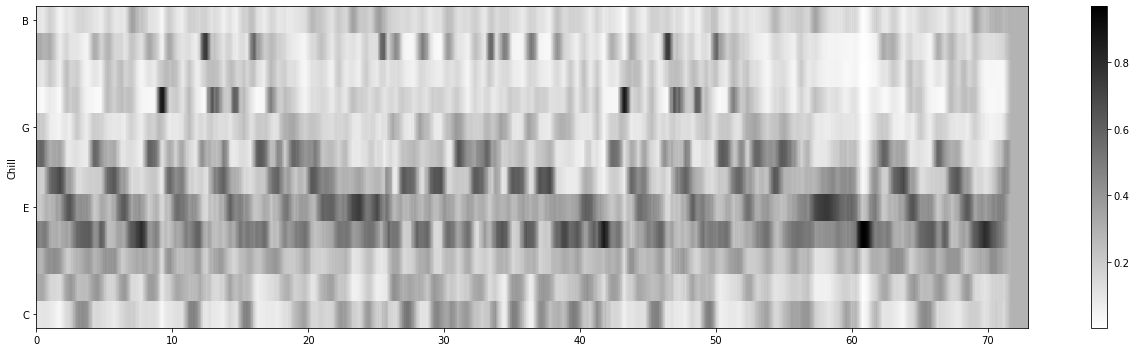

In [46]:
def smooth_feature_sequence(X,
                            Fs, 
                            L=41,
                            w_type='boxcar'):
    
    """Smoothes and downsamples a feature sequence. Smoothing is achieved by convolution with a filter kernel

    :params:
        X (np.ndarray): features
        Fs (scalar): frame rate of X
        L (int): tamanho do filtro de suavização (default = 41)
        w_type (str): tipo de janela (default = 'boxcar')

    :return:
        X_smooth (np.ndarray): smoothed feature sequence
        Fs_feature (scalar): frame rate of ``X_smooth``
    """
    
    # aqui estruturamos a janela que usaremos na suavização. o default é uma uniforme de tamanho L
    filt_kernel = np.expand_dims(signal.get_window(w_type, L), axis=0)
    
    # essa função convolve aplica o filt_kernel no sinal X
    X_smooth = signal.convolve(X, filt_kernel, mode='same') / L
    Fs_feature = Fs 
    return X_smooth, Fs_feature

L = 11
down_sampling = 2
C_smooth_dict = {}
C_smooth, Fs_C_smooth = smooth_feature_sequence(C_dict[name], Fs_C, 
                                    L=L)
C_smooth_dict[name] = libfmp.c3.normalize_feature_sequence(C_smooth, norm='2', threshold=threshold)
libfmp.b.plot_chromagram(C_smooth_dict[name], Fs_C_smooth, figsize=figsize, 
                         ylabel=name, title='',  xlabel='', chroma_yticks=yticks);


In [47]:
print(Fs_C_smooth, len(C_smooth.transpose()))

21.533203125 1572


Juntando os dois:

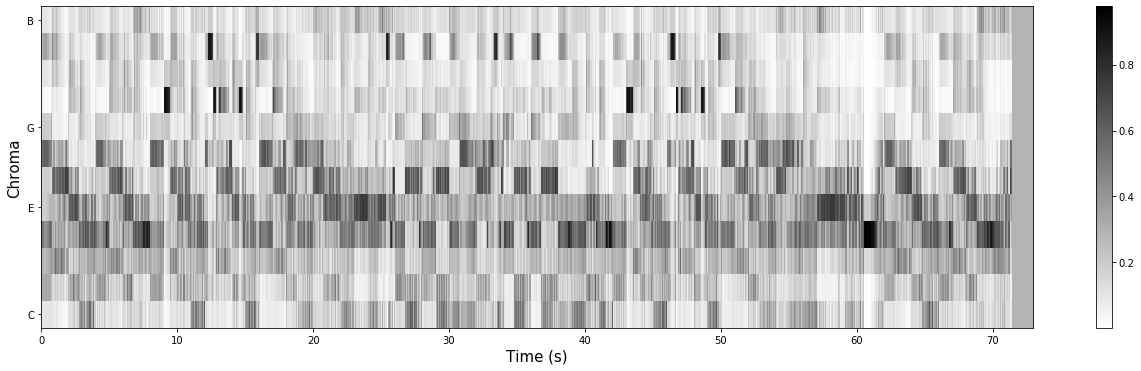

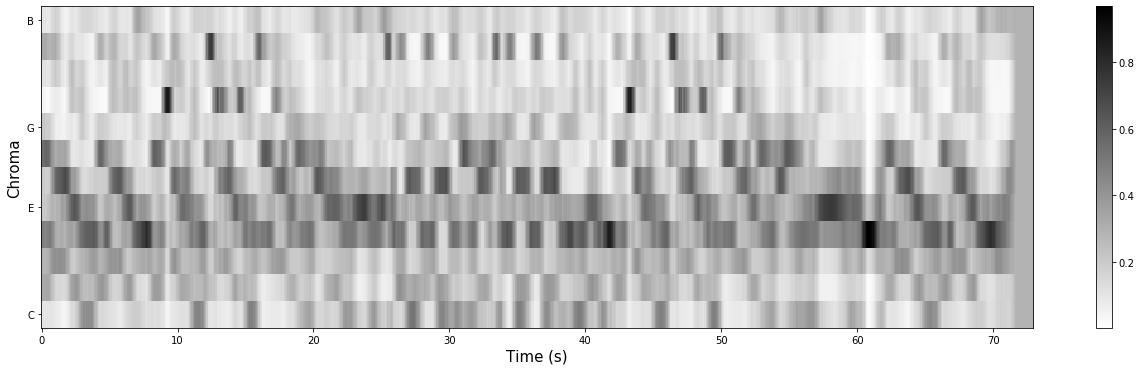

In [17]:
libfmp.b.plot_chromagram(C_dict[name], Fs_C, figsize=figsize, chroma_yticks=yticks)
plt.ylabel('Chroma', fontsize=15);
plt.xlabel('Time (s)', fontsize=15);

libfmp.b.plot_chromagram(C_smooth_dict[name], Fs_C_smooth, figsize=figsize, 
                         ylabel='Chroma', title='', chroma_yticks=yticks)
plt.ylabel('Chroma', fontsize=15);
plt.xlabel('Time (s)', fontsize=15);